# 학생 성적 관련 실습예제 

## 데이터셋 

In [1]:
import pandas as pd
import numpy as np

# 데이터 생성
np.random.seed(42)

data = {
    'student_id': range(1, 201),
    'gender': np.random.choice(['Male', 'Female'], 200),
    'class': np.random.choice(['A', 'B', 'C'], 200),
    'study_hours': np.random.normal(5, 2, 200).clip(0, 12).round(1),
    'math_score': np.random.normal(75, 15, 200).clip(0, 100).round(0),
    'english_score': np.random.normal(70, 12, 200).clip(0, 100).round(0),
    'pass': np.random.choice([0, 1], 200, p=[0.3, 0.7]),
    'attendance': np.random.choice(['Good', 'Bad'], 200, p=[0.7, 0.3])
}

df = pd.DataFrame(data)

# 약간의 관계 만들기
df.loc[df['gender'] == 'Female', 'english_score'] += 5
df.loc[df['study_hours'] > 7, 'math_score'] += 10
df.loc[df['attendance'] == 'Good', 'pass'] = np.random.choice([0, 1], (df['attendance'] == 'Good').sum(), p=[0.2, 0.8])

df['math_score'] = df['math_score'].clip(0, 100)
df['english_score'] = df['english_score'].clip(0, 100)

# 데이터 저장
df.to_csv('student_data.csv', index=False)

print(df.head(10))
print(f"\n데이터 크기: {df.shape}")
print(f"\n컬럼 정보:\n{df.dtypes}")

   student_id  gender class  study_hours  math_score  english_score  pass  \
0           1    Male     C          5.9        80.0           64.0     1   
1           2  Female     C          4.9       100.0           65.0     1   
2           3    Male     A          3.3        89.0           80.0     1   
3           4    Male     A          2.0        66.0           60.0     1   
4           5    Male     B          4.1        62.0           71.0     1   
5           6  Female     A          6.7        82.0           69.0     1   
6           7    Male     C          5.4        55.0           76.0     0   
7           8    Male     C          2.5       100.0           74.0     0   
8           9    Male     A          5.3        93.0           82.0     1   
9          10  Female     C          5.8        68.0           69.0     0   

  attendance  
0       Good  
1       Good  
2       Good  
3        Bad  
4       Good  
5       Good  
6       Good  
7        Bad  
8       Good  
9 

### 데이터 파악 및 정제

In [ ]:
df.describe() # -> 튀는거랑 이상없음. 분포는 확인해볼만한듯

,student_id,study_hours,math_score,english_score,pass
count,200.000000,200.000000,200.000000,200.000000,200.00000
mean,100.500000,5.095500,75.010000,72.440000,0.79000
std,57.879185,1.887204,14.929647,12.164963,0.40833
min,1.000000,0.000000,38.000000,38.000000,0.00000
25%,50.750000,3.700000,64.000000,64.000000,1.00000
50%,100.500000,5.100000,76.000000,72.000000,1.00000
75%,150.250000,6.300000,86.000000,81.000000,1.00000
max,200.000000,12.000000,100.000000,100.000000,1.00000


<Axes: >

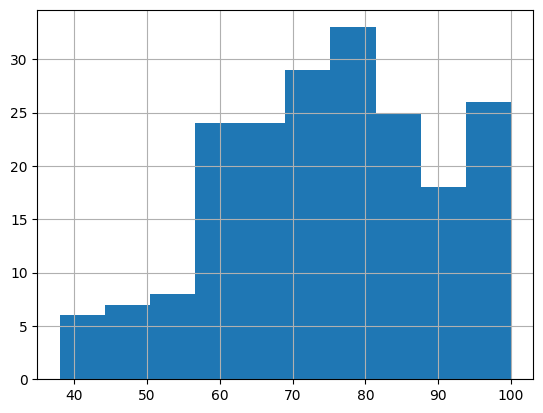

In [7]:
df['math_score'].hist()

<Axes: >

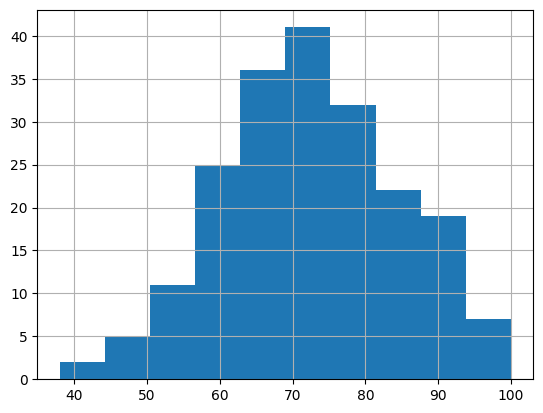

In [8]:
df['english_score'].hist()

<Axes: >

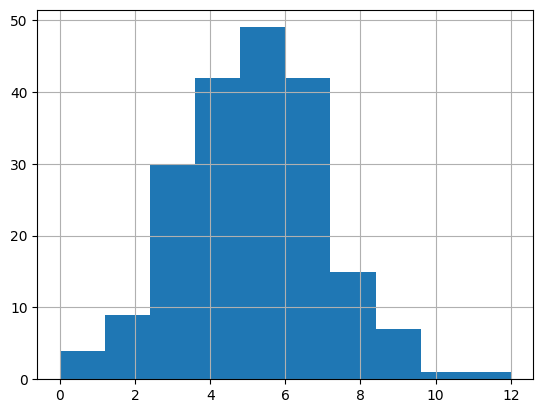

In [10]:
df['study_hours'].hist()

In [17]:
print(df['pass'].value_counts())
print(f'\n합격률 : {df['pass'].mean()}')

pass
1    158
0     42
Name: count, dtype: int64

합격률 : 0.79


In [ ]:
df.info() # -> gender,class, attendance 구성 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   student_id     200 non-null    int64  
 1   gender         200 non-null    object 
 2   class          200 non-null    object 
 3   study_hours    200 non-null    float64
 4   math_score     200 non-null    float64
 5   english_score  200 non-null    float64
 6   pass           200 non-null    int64  
 7   attendance     200 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 12.6+ KB


In [24]:
df[['gender','class','attendance']] = df[['gender','class','attendance']].astype('string')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   student_id     200 non-null    int64  
 1   gender         200 non-null    string 
 2   class          200 non-null    string 
 3   study_hours    200 non-null    float64
 4   math_score     200 non-null    float64
 5   english_score  200 non-null    float64
 6   pass           200 non-null    int64  
 7   attendance     200 non-null    string 
dtypes: float64(3), int64(2), string(3)
memory usage: 12.6 KB


## 질문 1: 남학생과 여학생의 합격률에 차이가 있는가?

## 질문 2: 남학생과 여학생의 수학 평균 점수에 차이가 있는가?

## 질문 3: 출석률(Good/Bad)과 합격여부(0/1)가 관련이 있는가?

## 질문 4: 공부시간과 수학점수는 상관관계가 있는가?


## 질문 5: A반, B반, C반의 영어 평균 점수에 차이가 있는가?
